In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install torch

In [ ]:
import torch
torch.cuda.empty_cache()

torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [ ]:
!pip install transformers==3.0.0

     |████████████████████████████████| 757kB 13.8MB/s 
     |████████████████████████████████| 3.0MB 33.2MB/s 
     |████████████████████████████████| 1.1MB 60.0MB/s 
     |████████████████████████████████| 890kB 56.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=719635c925f83d3bfaccaa6221c23e8178d234a54d9ce976b3c724f5bc19ec65
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import XLNetConfig, XLNetTokenizer, XLNetForSequenceClassification
from transformers import BertTokenizer, BertModel


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_file.txt', sep='{}{}{}', engine = 'python')
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_file.txt", sep= '{}{}{}', engine = 'python')
devset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/devset.txt", sep= '{}{}{}', engine = 'python')
#train_inputs, validation_inputs, train_labels, validation_labels = train_test_split()
#from sklearn.model_selection import train_test_split

train, val =  train,test

In [ ]:
from sklearn.utils import shuffle

train = shuffle(train)
train.head()

,Label,Text
10064,__label__dt,Tiki Description The Tiki is not really an i...
8195,__label__pb,"On Monday 20 August, preparing to leave New Ze..."
7631,__label__pb,My unforgettable Olympic experience October 9...
5821,__label__ne,Netlore Archive: Forwarded email recounts the ...
5228,__label__ne,News Dick Taylor of the Rolling Stones & the ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

labels =train['Label'].values
label_encoder = LabelEncoder()    # Turns class labels into integers
Y = label_encoder.fit_transform(labels)
labels_dev=devset['Label'].values

# Take note of how many unique labels there are in the data
num_labels = len(set(Y))


# Print out some examples
print('Number of unique labels:', num_labels)
print(type(labels), labels[:10])
print(type(Y), Y[:10])
print('\n')
print(labels_dev[:10])

Number of unique labels: 26
<class 'numpy.ndarray'> ['__label__dt' '__label__pb' '__label__pb' '__label__ne' '__label__ne'
 '__label__ne' '__label__qa' '__label__ne' '__label__rv' '__label__ne']
<class 'numpy.ndarray'> [ 4 14 14 12 12 12 16 12 20 12]


['__label__ht' '__label__ht' '__label__ht' '__label__ht' '__label__ht'
 '__label__ht' '__label__ht' '__label__ht' '__label__ht' '__label__ht']


In [ ]:
Y_val = label_encoder.fit_transform(test['Label'].values)

In [ ]:
Y_val

array([13, 13, 13, ...,  9,  9,  9])

In [ ]:

# Get sentence data
sents = train.Text.to_list()
sents[0]

'Tiki  Description  The Tiki is not really an indicator (in the sense of moving averages ), but it can be used as an indicator when day trading. The Tiki is one of three market internals, with the Trin and Ticks being the other two. The Tiki compares the number of upticking (price increasing) and downticking (price decreasing) stocks in the Dow Jones Stock Index, and calculates a ratio showing whether there are more upticking or downticking stocks.  The Tiki is based upon the stocks that are included in the Dow Jones Stock Index, so it is primarily (actually almost exclusively) used as an indicator for the US markets, but the same principles and formulae can be applied to the European and Asian markets.  The Tiki can be displayed as a single line, or as a bar chart, but it is always displayed on its own chart, separate from the price bars.  Calculation  Description : The Tiki (T) is a comparison of the number of upticking and downticking stocks.  Calculation : T = Upticking Stocks - Do

In [ ]:
labels = train.Label.to_list()
print(labels[0])

__label__dt


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
n_gpu

1

### Bert Tokenizer

In [ ]:
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', output_hidden_states = True)

### Tokenization using XLNet

In [ ]:
list(tokenizer_bert.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [ ]:
!pip install sentencepiece
vocabulary = '/content/drive/My Drive/Colab Notebooks/xlnet-base-cased-spiece.model'


In [ ]:
max_len  = 256

In [ ]:
# With cased model, set do_lower_case = False
#tokenizer_xlnet = XLNetTokenizer(vocab_file=vocabulary,do_lower_case=True)

In [ ]:
var = tokenizer_bert("god is great , the movie's not")
print(var['input_ids'])
print(var['token_type_ids'])
print(var['attention_mask'])
print(tokenizer_bert.tokenize("god is great , the movie's not"))
print(tokenizer_bert.encode('_god'))
print(tokenizer_bert.decode(101))
print(tokenizer_bert.decode(102))

[101, 2643, 2003, 2307, 1010, 1996, 3185, 1005, 1055, 2025, 102]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['god', 'is', 'great', ',', 'the', 'movie', "'", 's', 'not']
[101, 1035, 2643, 102]
[ C L S ]
[ S E P ]


In [ ]:
# var = tokenizer_bert("god is great , the movie's not")
# print(var['input_ids'])
# print(var['token_type_ids'])
# print(var['attention_mask'])
# print(tokenizer_xlnet.tokenize("god is great , the movie's not"))
# print(tokenizer_xlnet.encode('_god'))
# print(tokenizer_xlnet.decode(3))

In [ ]:
tokenizer_bert.encode('word')

[101, 2773, 102]

In [ ]:
#tokenizer_xlnet.encode('word')

### BERT Embedding

In [ ]:
var = tokenizer_bert(['This is great world.','World is good.'], add_special_tokens= True, max_length=20,  padding= 'max_length', return_attention_mask=True )
var

{'input_ids': [[101, 2023, 2003, 2307, 2088, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2088, 2003, 2204, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [ ]:
tokenized_text_bert = tokenizer_bert(list(train.Text.values), 
                                     add_special_tokens= True,
                                     max_length=256,  
                                     padding= 'max_length', 
                                     return_attention_mask=True,
                                     return_tensors='pt', 
                                     truncation=True )

In [ ]:
# tokenized_text_xl = tokenizer_xlnet( vocabulary, max_length=256,add_special_tokens =True , padding= 'max_length', return_tensors='pt',truncation=True )
# tokenized_text_xl.keys()

In [ ]:
tokenizedtext_bert_test = tokenizer_bert(list(test.Text.values), 
                                     add_special_tokens= True,
                                     max_length=256,  
                                     padding= 'max_length', 
                                     return_attention_mask=True,
                                     return_tensors='pt', 
                                     truncation=True 
    
)

In [ ]:
# train.Text.values[:10]

In [ ]:
#print((tokenized_text['input_ids'][:2]))
tokenized_text_bert.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
input_ids = tokenized_text_bert['input_ids']
attention_masks = tokenized_text_bert['attention_mask']
Y [:10]


array([ 4, 14, 14, 12, 12, 12, 16, 12, 20, 12])

In [ ]:
inputid_test = tokenizedtext_bert_test['input_ids']
attentionmask_test = tokenizedtext_bert_test['attention_mask']
Y_val = torch.Tensor(Y_val)

In [ ]:
# from transformers import BertTokenizer

# # Load the BERT tokenizer.
# print('Loading BERT tokenizer...')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# max_len = 0

# # For every sentence...
# for sent in sentences:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     input_ids = tokenizer.encode(sent, add_special_tokens=True)

#     # Update the maximum sentence length.
#     max_len = max(max_len, len(input_ids))

# print('Max sentence length: ', max_len)

In [ ]:
#tokenized_text['token_type_ids'][:2]

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # The number of output 
    
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
Y = torch.tensor(Y)
#Y_val = torch.tensor(Y_val)
Y

tensor([ 4, 14, 14,  ...,  1, 12,  5])

In [ ]:
Y_val = torch.tensor(Y_val, dtype=torch.long)
Y_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([13, 13, 13,  ...,  9,  9,  9])

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, Y ) #labels = Y
val_dataset = TensorDataset(inputid_test,attentionmask_test,Y_val)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32


# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
for batch in validation_dataloader:
  print((batch[2].to(device)))
  break

tensor([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       device='cuda:0')


In [ ]:
for batch in train_dataloader:
  print((batch[2].to(device)))
  break

tensor([22, 16, 12, 22,  9, 17, 19, 12,  8, 12, 22, 12,  3, 12, 14, 22, 12,  1,
        12,  1, 24, 17, 13, 22,  4, 14,  5,  1,  9, 12, 12, 20],
       device='cuda:0')


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 8
batch_size = 32

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import numpy as np
a  = np.array([[0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1], [0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1], [0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1],[0., 0.03,.01, 0., 0.02,.1,0.0, 0.5,.2,.1]])
a

array([[0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ],
       [0.  , 0.03, 0.01, 0.  , 0.02, 0.1 , 0.  , 0.5 , 0.2 , 0.1 ]])

In [ ]:
#conf(np.argmax(a), truelabe)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def wipe_memory(self): # DOES WORK
    self._optimizer_to(torch.device('cpu'))
    del self.optimizer
    gc.collect()
    torch.cuda.empty_cache()

def _optimizer_to(self, device):
    for param in self.optimizer.state.values():
        # Not sure there are any global tensors in the state dict
        if isinstance(param, torch.Tensor):
            param.data = param.data.to(device)
            if param._grad is not None:
                param._grad.data = param._grad.data.to(device)
        elif isinstance(param, dict):
            for subparam in param.values():
                if isinstance(subparam, torch.Tensor):
                    subparam.data = subparam.data.to(device)
                    if subparam._grad is not None:
                        subparam._grad.data = subparam._grad.data.to(device)

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
      

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        if torch.cuda.is_available():
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
        else:
          torch.cuda.empty_cache()

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        if torch.cuda.is_available():
          loss, logits = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask, 
                              labels=b_labels)
        else:
          torch.cuda.empty_cache()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    predictions = [] #store prediction
    true_labels = []

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
 
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            if torch.cuda.is_available():
              (loss, logits) = model(b_input_ids, 
              token_type_ids=None, 
              attention_mask=b_input_mask,
              labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        #collect predictions
        # 
        pred = np.argmax(logits, 1)
        predictions.append(pred)
        #prediction.append(logits)
        true_labels.append(label_ids)

      

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 8 ========
Training...
  Batch    40  of    550.    Elapsed: 0:00:18.
  Batch    80  of    550.    Elapsed: 0:00:36.
  Batch   120  of    550.    Elapsed: 0:00:54.
  Batch   160  of    550.    Elapsed: 0:01:12.
  Batch   200  of    550.    Elapsed: 0:01:31.
  Batch   240  of    550.    Elapsed: 0:01:49.
  Batch   280  of    550.    Elapsed: 0:02:07.
  Batch   320  of    550.    Elapsed: 0:02:25.
  Batch   360  of    550.    Elapsed: 0:02:43.
  Batch   400  of    550.    Elapsed: 0:03:01.
  Batch   440  of    550.    Elapsed: 0:03:19.
  Batch   480  of    550.    Elapsed: 0:03:37.
  Batch   520  of    550.    Elapsed: 0:03:55.

  Average training loss: 1.22
  Training epcoh took: 0:04:09

Running Validation...
  Accuracy: 0.74
  Validation Loss: 0.88
  Validation took: 0:00:10

======== Epoch 2 / 8 ========
Training...
  Batch    40  of    550.    Elapsed: 0:00:18.
  Batch    80  of    550.    Elapsed: 0:00:36.
  Batch   120  of    550.    Elapsed: 0:00:54.
  Batch  

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.22,0.88,0.74,0:04:09,0:00:10
2,0.61,0.86,0.76,0:04:09,0:00:10
3,0.34,0.92,0.75,0:04:10,0:00:10
4,0.18,1.06,0.75,0:04:09,0:00:10
5,0.10,1.21,0.75,0:04:09,0:00:10
6,0.05,1.31,0.75,0:04:08,0:00:10
7,0.02,1.45,0.74,0:04:07,0:00:10
8,0.01,1.45,0.75,0:04:07,0:00:10


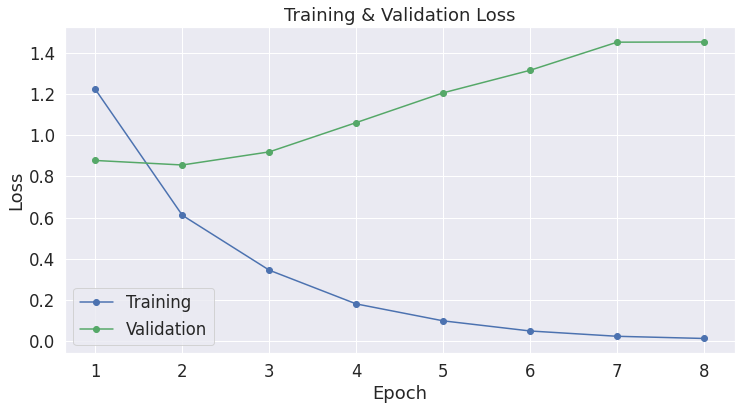

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8])

plt.show()

In [ ]:
# Testing on val set
model.eval()

# Tracking variables 
total_eval_accuracy = 0
total_eval_loss = 0
nb_eval_steps = 0
prediction = [] #store prediction

# Evaluate data for one epoch
for batch in validation_dataloader:
    
    # Unpack this training batch from our dataloader. 
    #
    # As we unpack the batch, we'll also copy each tensor to the GPU using 
    # the `to` method.
    #
    # `batch` contains three pytorch tensors:
    #   [0]: input ids 
    #   [1]: attention masks
    #   [2]: labels 
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    
    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        (loss, logits) = model(b_input_ids, 
                                token_type_ids=None, 
                                attention_mask=b_input_mask,
                                labels=b_labels)
        
    # Accumulate the validation loss.
    total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    #collect predictions
    # 
    pred = np.argmax(logits, 1)
    prediction.append(pred)

    # Calculate the accuracy for this batch of test sentences, and
    # accumulate it over all batches.
    total_eval_accuracy += flat_accuracy(logits, label_ids)
    

# Report the final accuracy for this validation run.
avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

# # Calculate the average loss over all of the batches.
# avg_val_loss = total_eval_loss / len(validation_dataloader)

# # Measure how long the validation run took.
# validation_time = format_time(time.time() - t0)

print("  Validation Loss: {0:.2f}".format(avg_val_loss))
print("  Validation took: {:}".format(validation_time))


#print('Positive samples: %d of %d (%.2f%%)' % (train.label.sum(), len(train.label), (train.label.sum() / len(train.label) * 100.0)))


  Accuracy: 0.75
  Validation Loss: 1.45
  Validation took: 0:00:10


In [ ]:
# import os

# # Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

# output_dir = '/content/drive/My Drive/Colab Notebooks/BERT/'

# # Create output directory if needed
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# print("Saving model to %s" % output_dir)

# # Save a trained model, configuration and tokenizer using `save_pretrained()`.
# # They can then be reloaded using `from_pretrained()`
# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
# tokenizer_bert.save_pretrained(output_dir)

# # Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

In [ ]:
from sklearn.metrics import classification_report
flat_predictions = [item for sublist in predictions for item in sublist]
#flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
len(flat_predictions)

2210

In [ ]:
len(flat_true_labels)

2210

In [ ]:
%matplotlib inline
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.37      0.58      0.45        31
           1       0.84      0.72      0.77       180
           2       0.63      0.63      0.63        30
           3       0.56      0.71      0.62        69
           4       0.65      0.57      0.61       150
           5       0.89      0.91      0.90        46
           6       0.50      0.70      0.58        10
           7       0.00      0.00      0.00         2
           8       0.85      0.55      0.67        20
           9       0.78      0.72      0.75        83
          10       0.12      0.15      0.14        33
          11       0.77      0.63      0.69        27
          12       0.90      0.81      0.85       614
          13       0.59      0.64      0.61       188
          14       0.61      0.64      0.62       138
          15       0.60      0.60      0.60         5
          16       0.76      0.88      0.82        91
          17       0.98    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score
f1_score(flat_true_labels, flat_predictions, average='micro')

0.7547511312217194

In [ ]:
f1_score(flat_true_labels, flat_predictions, average='macro')

0.6375211074865211

In [ ]:
f1_score(flat_true_labels, flat_predictions, average='weighted')

0.7577297437537398